## Projet SafeDrive2022

Dans le cadre de l'initiative "SafeDrive2022", nous analysons les données des accidents de la route pour l'année 2022. L'objectif est d'identifier des tendances, des modèles, et des facteurs de risque afin de suggérer des mesures pour améliorer la sécurité routière.

Compréhension du Problème :
Description Rapide des Tables
Table "CARACTERISTIQUE" : Cette table fournit des détails généraux sur chaque accident, comme la date, l'heure, les conditions d'éclairage, la localisation, etc.

Table "LIEUX" : Cette table donne des informations sur l'endroit précis où l'accident s'est produit, comme le type de route, le nombre de voies, etc.

Table "VEHICULES" : Informations détaillées sur chaque véhicule impliqué dans un accident.

Table "USAGERS" : Informations détaillées sur chaque usager impliqué dans un accident, telles que la gravité des blessures, la catégorie d'usager (conducteur, passager, etc.), le sexe, l'année de naissance, et d'autres détails spécifiques.


## 1.Importer les bibliothèques nécessaires



In [6]:
# Installer les bibliothèques nécessaires
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install folium

# Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium


## 2. Importer les données:


In [ ]:
import pandas as pd
from google.colab import drive  # Importer google.colab pour monter Google Drive

# Monter Google Drive
drive.mount('/content/drive')

# Charger les fichiers CSV depuis le dossier "Projet_DS" sur Google Drive
df_vehicules = pd.read_csv('/content/drive/MyDrive/Projet_DS/vehicules-2022.csv', sep=';')
df_usagers = pd.read_csv('/content/drive/MyDrive/Projet_DS/usagers-2022.csv', sep=';')
df_lieux = pd.read_csv('/content/drive/MyDrive/Projet_DS/lieux-2022.csv', sep=';')
df_caracteristiques = pd.read_csv('/content/drive/MyDrive/Projet_DS/carcteristiques-2022.csv', sep=';')


Mounted at /content/drive


<ipython-input-2-3113b86ff1ad>:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv('/content/drive/MyDrive/Projet_DS/lieux-2022.csv', sep=';')


## 3. Vue d'ensemble des tables

In [ ]:
df_vehicules.head()


,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202200000001,813 952,A01,1,2,0,2,1,9,1,NaN
1,202200000001,813 953,B01,1,7,0,2,2,1,1,NaN
2,202200000002,813 950,B01,2,7,0,2,8,15,1,NaN
3,202200000002,813 951,A01,2,10,0,2,1,1,1,NaN
4,202200000003,813 948,A01,2,7,0,2,1,2,1,NaN


In [ ]:
df_usagers.head()


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1


In [ ]:
df_lieux.head()


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,4,TEIL(vieille route du),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000002,4,NaN,0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000003,3,ROND POINT DE BREZILLET,0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,5,1,50
3,202200000004,4,QUATORZE JUILLET (RUE DU),0,NaN,1,1,0,2,(1),(1),1,NaN,4,1,0,1,30
4,202200000005,3,ROUTE DE JEAN MOULIN-RN 538,0,NaN,2,2,0,1,8,0,1,NaN,-1,1,0,1,80


In [ ]:
df_caracteristiques.head()


,Accident_Id,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202200000001,19,10,2022,16:15,1,26,26198,2,3,1,3,TEIL(vieille route du),"44,5594200000","4,7257200000"
1,202200000002,20,10,2022,08:34,1,25,25204,2,3,1,3,Miranda,"46,9258100000","6,3462000000"
2,202200000003,20,10,2022,17:15,1,22,22360,2,6,1,2,ROND POINT DE BREZILLET,"48,4931620000","-2,7604390000"
3,202200000004,20,10,2022,18:00,1,16,16102,2,3,8,6,LOHMEYER (RUE),"45,6926520000","-0,3262900000"
4,202200000005,19,10,2022,11:45,1,13,13103,1,1,1,2,ROUTE DE JEAN MOULIN-RN 538,"43,6755790366","5,0927031775"


## 4.Harmonisation des Noms de Colonnes

Afin d'assurer une uniformité dans nos ensembles de données et simplifier les opérations futures, il est judicieux de standardiser les noms de nos colonnes.

À cet effet, nous modifierons le nom de la colonne `"Accident_Id"` pour le remplacer par `"Num_Acc"` dans le DataFrame `df_caracteristiques`, pour le rendre conforme aux autres DataFrames.


In [ ]:
df_caracteristiques.rename(columns={"Accident_Id" : "Num_Acc"},inplace=True)

## 5.Projet "SafeDrive2022" - Agrégation des Données
Dans le cadre de notre initiative "SafeDrive2022", nous aspirons à avoir une compréhension intégrale des incidents sur la route. Pour ce faire, nous avons jugé nécessaire d'agréger les différentes sources d'informations en un unique DataFrame. Voici comment nous avons
 procédé :

Association entre df_users et df_vehicles :
Ils nous offrent une vue sur les véhicules en cause et leurs passagers. En les combinant via 'id_vehicule', nous consolidons le rapport entre chaque passager et son véhicule associé.

Ajout de df_features :
En se basant sur la colonne 'Num_Acc', nous y intégrons les détails spécifiques de chaque accident pour enrichir notre ensemble de données.

Intégration des informations de localisation avec df_places :
Il est vital de connaître le lieu précis de chaque accident pour une analyse complète. En fusionnant ces données, nous obtenons un panorama détaillé des lieux d'accidents.

Finalement, notre DataFrame consolidé, que nous appellerons df_overview, représente l'aboutissement de ces agrégations et constituera la base de nos futures explorations.

In [ ]:
df_caracteristiques.rename(columns={"Accident_Id" : "Num_Acc"}, inplace=True)
df_users_vehicles = pd.merge(df_usagers, df_vehicules, on='id_vehicule', suffixes=("", "_to_trash")).drop(columns=["Num_Acc_to_trash", "num_veh_to_trash"])
df_users_vehicles_features = pd.merge(df_users_vehicles, df_caracteristiques, on="Num_Acc")
df_overview = pd.merge(df_users_vehicles_features, df_lieux, on="Num_Acc")
df_overview



,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,...,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,...,1,(1),(1),1,NaN,-1,1,0,1,50
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,...,1,(1),(1),1,NaN,-1,1,0,1,50
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,...,1,(1),(1),1,NaN,-1,1,0,1,50
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,...,1,(1),(1),1,NaN,-1,1,0,1,50
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,...,1,0,0,1,NaN,-1,1,5,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,968 230,715 631,A01,1,1,1,2,2002.0,5,...,1,30,125,1,NaN,-1,1,0,1,80
126658,202200055301,968 231,715 631,A01,8,2,3,2,2004.0,5,...,1,30,125,1,NaN,-1,1,0,1,80
126659,202200055301,968 232,715 632,B01,1,1,4,2,1953.0,5,...,1,30,125,1,NaN,-1,1,0,1,80
126660,202200055302,968 228,715 629,A01,1,1,3,1,1992.0,1,...,1,(1),(1),1,NaN,4,1,0,1,70


## 6.Exploration des Tendances Chronologiques

Incidents Mensuels
Jetons un œil au volume d'accidents survenant chaque mois. Cela nous aidera à déceler si certains mois présentent un risque accru en termes d'incidents routiers.


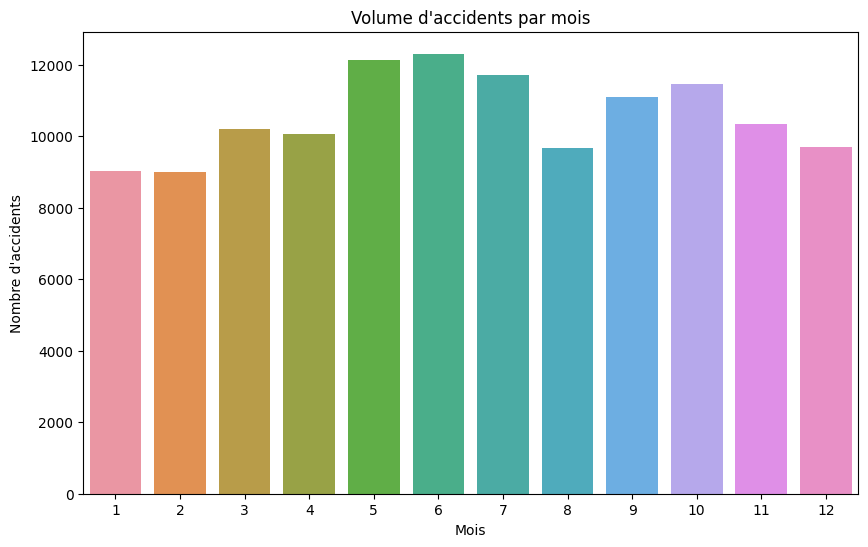

In [ ]:
# A. Exploration des Tendances Chronologiques
# Incidents Mensuels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_overview, x='mois')
plt.title('Volume d\'accidents par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'accidents')
plt.show()



**Observation des Tendances Temporelles**:

En analysant la distribution mensuelle des accidents à partir de notre DataFrame `df_overview`, une augmentation notable des incidents durant les mois de mai, juin et juillet est observée.

Plusieurs facteurs peuvent être à l'origine de cette tendance :

- **Saison estivale** : La période de mai à juillet correspond généralement à la saison estivale dans de nombreux pays. C'est une période où les gens ont tendance à sortir davantage, que ce soit pour des vacances, des sorties familiales ou des voyages plus longs.

- **Augmentation du trafic routier** : L'été entraîne souvent une hausse de la circulation, notamment avec une augmentation des véhicules de tourisme et des deux-roues. Cette densité accrue sur les routes peut être un facteur contribuant à l'augmentation des accidents.

- **Festivals et événements** : Ces mois pourraient coïncider avec des festivals locaux, des vacances ou des événements spéciaux, entraînant un afflux de visiteurs et donc une circulation routière plus dense.

- **Conditions routières** : Bien que l'été soit associé à un temps généralement clément, certaines régions peuvent être sujettes à des orages soudains ou à d'autres phénomènes météorologiques qui peuvent rendre les routes glissantes ou moins visibles.

Il est essentiel de poursuivre l'analyse pour comprendre précisément les raisons de cette augmentation et envisager des mesures préventives adaptées pour réduire les risques d'accidents durant ces mois.


## 7.Répartition des Tranches d'Âge des Usagers dans les Incidents Routiers

L'analyse de la répartition par âge des individus concernés par des accidents routiers peut mettre en évidence des tranches d'âge plus exposées aux risques. Une telle compréhension peut guider des initiatives de prévention et des campagnes de sensibilisation adaptées à ces catégories d'âge spécifiques.


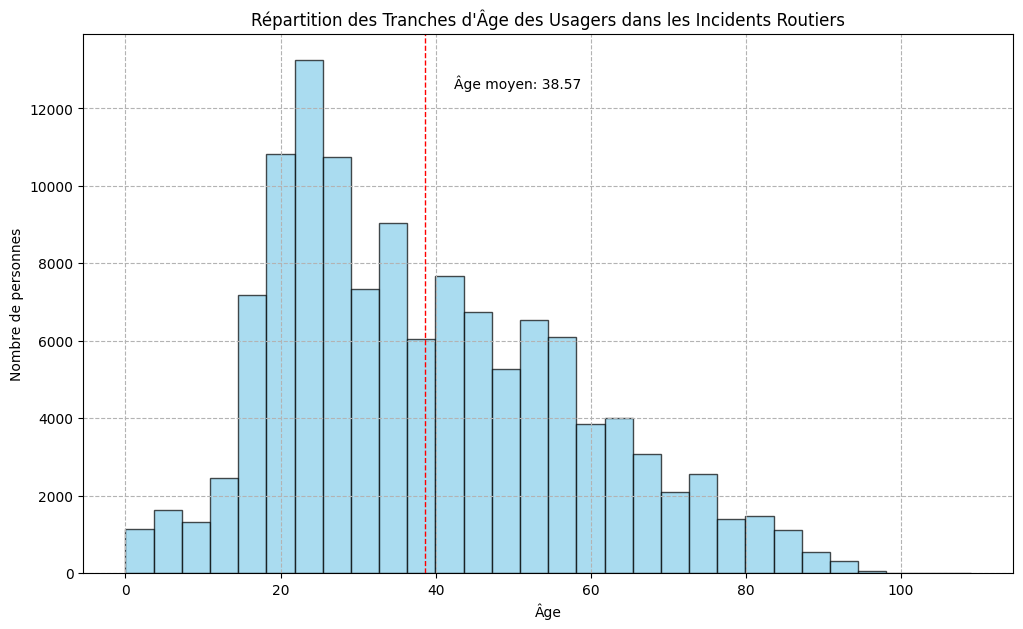

In [ ]:


# Calcul de l'âge des personnes basé sur l'année de naissance et l'année actuelle
current_year = 2022  # Cette année peut être mise à jour selon vos besoins
df_overview['age'] = current_year - df_overview['an_nais']

# Distribution des âges des personnes impliquées dans les accidents
plt.figure(figsize=(12, 7))
plt.hist(df_overview['age'], bins=30, edgecolor='k', alpha=0.7, color='skyblue')
plt.title('Répartition des Tranches d\'Âge des Usagers dans les Incidents Routiers')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.axvline(df_overview['age'].mean(), color='r', linestyle='dashed', linewidth=1)  # Ligne indiquant l'âge moyen
min_ylim, max_ylim = plt.ylim()
plt.text(df_overview['age'].mean()*1.1, max_ylim*0.9, 'Âge moyen: {:.2f}'.format(df_overview['age'].mean()))
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()


#Analyse des Tranches d'Âge et Propositions SafeDrive2022
La majorité des accidents impliquent des individus âgés de 18 à 21 ans, suivi d'une présence modérée des personnes autour de 40 ans et d'une faible occurrence chez les plus âgés. Face à cela, SafeDrive2022 suggère :

-Des formations renforcées pour les jeunes conducteurs.

-Des campagnes de sensibilisation sur la conduite imprudente.

-Des incitations pour des cours de conduite avancés.

-Promouvoir des pauses régulières pour éviter la fatigue.

-Favoriser les technologies d'assistance pour les conducteurs âgés.

### 8.Étude des Incidents Selon les Conditions Météorologiques
Les conditions météorologiques jouent souvent un rôle crucial dans les incidents routiers. En explorant les accidents survenus dans diverses situations climatiques, nous cherchons à déterminer si certaines d'entre elles augmentent le risque d'accident sur la route.

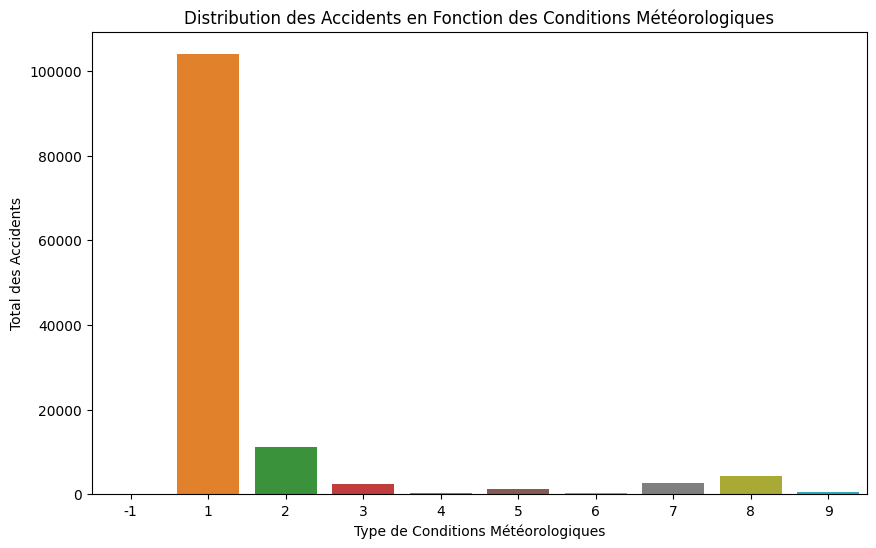

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_overview, x='atm')
plt.title('Distribution des Accidents en Fonction des Conditions Météorologiques')
plt.xlabel('Type de Conditions Météorologiques')
plt.ylabel('Total des Accidents')
plt.show()


##Commentaire:
D'après l'analyse, il est clairement évident que la majorité des accidents se produisent dans des conditions atmosphériques considérées comme "normales". Cela pourrait indiquer que d'autres facteurs, tels que le comportement des conducteurs ou les conditions de la route, jouent un rôle plus déterminant dans ces incidents plutôt que la météo en elle-même. Néanmoins, cela souligne aussi l'importance d'éduquer les conducteurs à adopter une conduite prudente même dans des conditions météorologiques favorables.

## 9 Analyse des Accidents par Département dans le Cadre du Projet "DriveSafe 2022"
Le projet "DriveSafe 2022" vise à cerner et à atténuer les facteurs de risque des accidents routiers. Un moyen efficace de procéder est d'étudier la distribution des accidents selon les départements. En identifiant les départements présentant un taux d'accidents élevé, nous pourrons mieux orienter nos initiatives de prévention et de sensibilisation.

Le graphique ci-dessous met en évidence chaque département sur l'axe des abscisses, tandis que l'axe des ordonnées représente le volume d'accidents. L'ordre décroissant permet une lecture facilitée et une détection immédiate des départements les plus touchés. Ces informations sont essentielles pour orienter nos actions et pour une allocation judicieuse des ressources du projet.







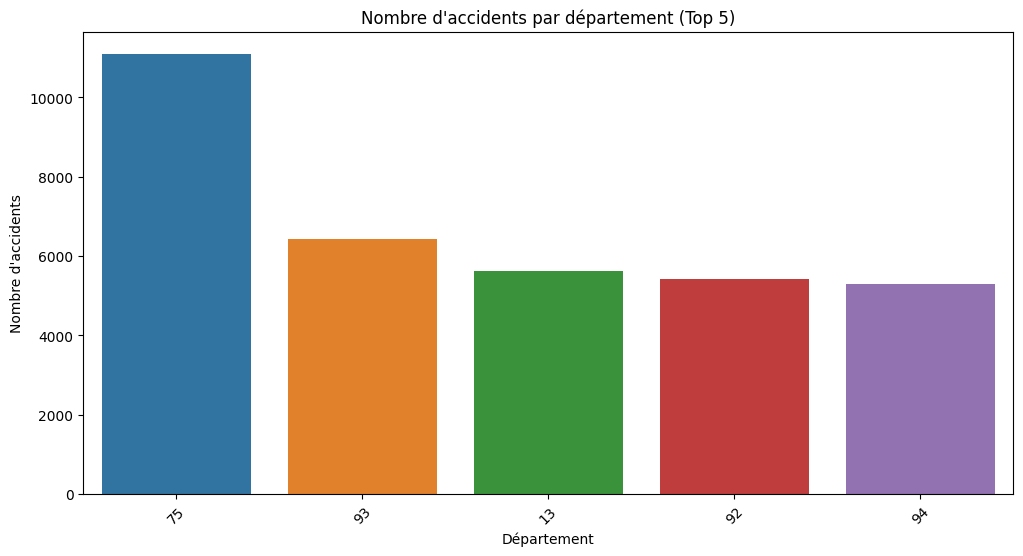

In [ ]:
# Sélectionner les 5 départements avec le plus d'accidents
top5_departments = df_overview['dep'].value_counts().head(5).index

# Filtrer le DataFrame pour ne contenir que ces départements
filtered_df_5 = df_overview[df_overview['dep'].isin(top5_departments)]

# Visualiser le nombre d'accidents dans ces départements
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df_5, x='dep', order = top5_departments)
plt.title('Nombre d\'accidents par département (Top 5)')
plt.xlabel('Département')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=45)
plt.show()



#Commentaires : Analyse des Départements à Fort Taux d'Accidents

Suite à notre étude, il ressort que le top 5 des départements les plus touchés par les accidents de la route se localisent majoritairement en Île-de-France. Cette observation est cruciale et nous orientera dans notre stratégie. Elle sera au cœur de notre campagne de sensibilisation pour "DriveSafe 2022" en vue d'une intervention ciblée.

## 10.Projet "SafeDrive2022" : Analyse des Scénarios d'Accidents

Dans le cadre de notre initiative "SafeDrive2022", il est essentiel d'identifier les scénarios d'accidents les plus courants. En analysant le nombre d'accidents selon le type de collision, nous obtenons un aperçu clair des situations typiques qui mènent à des incidents routiers. Cela nous permet d'orienter nos efforts pour cibler les risques spécifiques.


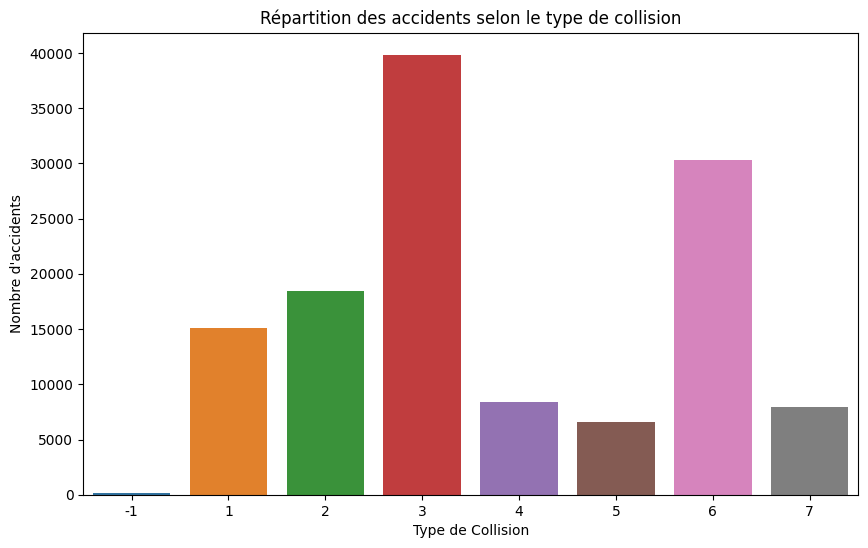

In [ ]:
# E. Profilage des Scénarios d'Accidents
# Visualisation du nombre d'accidents par type de collision (colonne 'col')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_overview, x='col')
plt.title('Répartition des accidents selon le type de collision')
plt.xlabel('Type de Collision')
plt.ylabel('Nombre d\'accidents')
plt.show()



# Commentaires:
## Observation et Solution :

D'après l'analyse, le scénario d'accident le plus fréquent implique une collision entre deux véhicules sur le côté. Cette information est cruciale pour "SafeDrive2022". Ainsi, une stratégie possible serait de lancer des campagnes de sensibilisation axées spécifiquement sur la prudence lors des changements de voie et des croisements. De plus, cela pourrait guider les autorités locales à envisager des améliorations dans la conception des intersections et des passages routiers pour minimiser ce type spécifique de risque.

#10. Évaluation de la Gravité des Accidents dans les Départements Clés

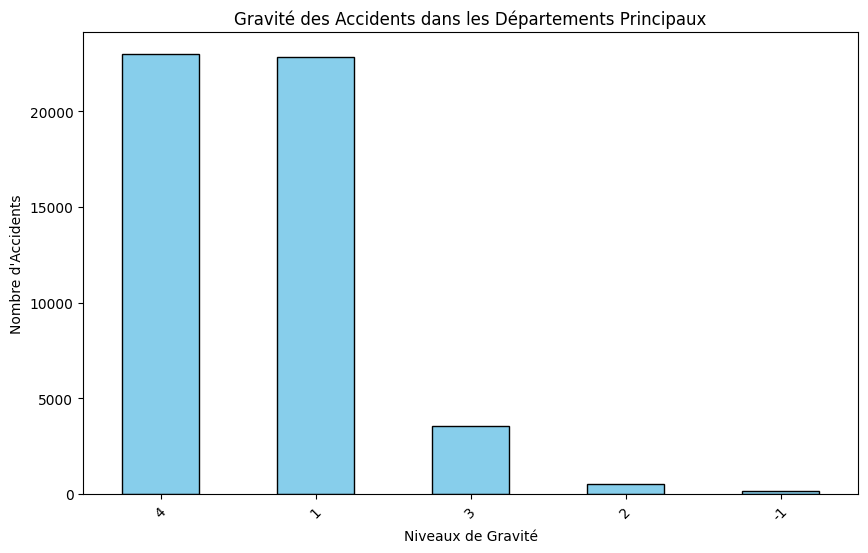

In [ ]:
# Filtrage des données pour ne conserver que les accidents dans les départements principaux
top_10_dep = df_overview['dep'].value_counts().head(10).index
top_accidents = df_overview[df_overview['dep'].isin(top_10_dep)]

# Analyse de la gravité des accidents dans ces départements
accident_severity = top_accidents['grav'].value_counts()

# Visualisation par un graphique à barres
plt.figure(figsize=(10, 6))
accident_severity.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gravité des Accidents dans les Départements Principaux')
plt.xlabel('Niveaux de Gravité')
plt.ylabel('Nombre d\'Accidents')
plt.xticks(rotation=45)
plt.show()



## Commentaire :
 Dans le contexte de l'initiative SafeDrive 2022, nous observons que la majorité des accidents dans ces départements entraîne des blessures légères ou n'entraîne aucune blessure (indemne). Cette information est cruciale pour orienter nos actions : bien que le nombre d'accidents soit élevé, la gravité semble être modérée. Cela suggère qu'il est essentiel de renforcer la sensibilisation à la sécurité et les bonnes pratiques de conduite pour prévenir ces incidents et leurs conséquences potentielles.

#11. Analyse des Accidents selon le Sexe des Usagers dans les Départements Clés

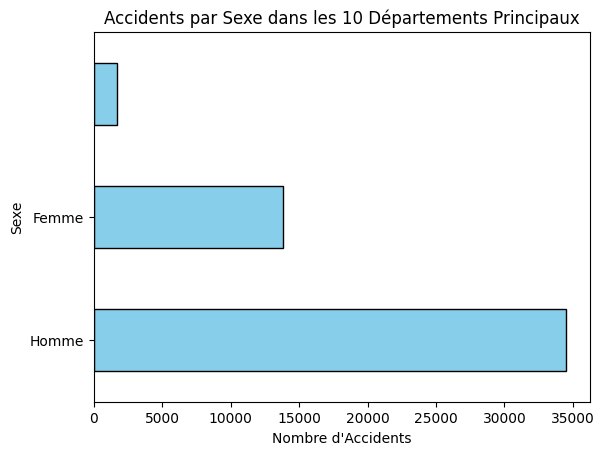

In [ ]:
# Compter les accidents par sexe
sex_accidents = top_accidents['sexe'].value_counts()

# Graphique à barres horizontales pour le sexe
sex_accidents.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Accidents par Sexe dans les 10 Départements Principaux')
plt.ylabel('Sexe')
plt.xlabel('Nombre d\'Accidents')
plt.yticks(ticks=[0, 1], labels=['Homme', 'Femme'])
plt.show()


## Commentaire :
Les données montrent que les hommes sont majoritairement impliqués dans les accidents dans ces régions. Cette prédominance masculine peut s'expliquer par des comportements de conduite différents ou une plus grande exposition aux risques. Pour le projet Drive Safe 2022, il est crucial d'axer les campagnes de sensibilisation sur les comportements de conduite des hommes, en insistant sur la prudence et la responsabilité. Des ateliers ciblés et des publicités orientées pourraient aider à réduire ces chiffres et à garantir une conduite plus sécuritaire pour tous.

#12. Illustration de la Répartition des Accidents selon le Type de Véhicule

Pour approfondir notre compréhension des circonstances des accidents, nous analysons comment ceux-ci se répartissent selon les différents types de véhicules concernés. Cette démarche pourrait mettre en lumière les catégories de véhicules qui ont tendance à être davantage impliquées dans des incidents.

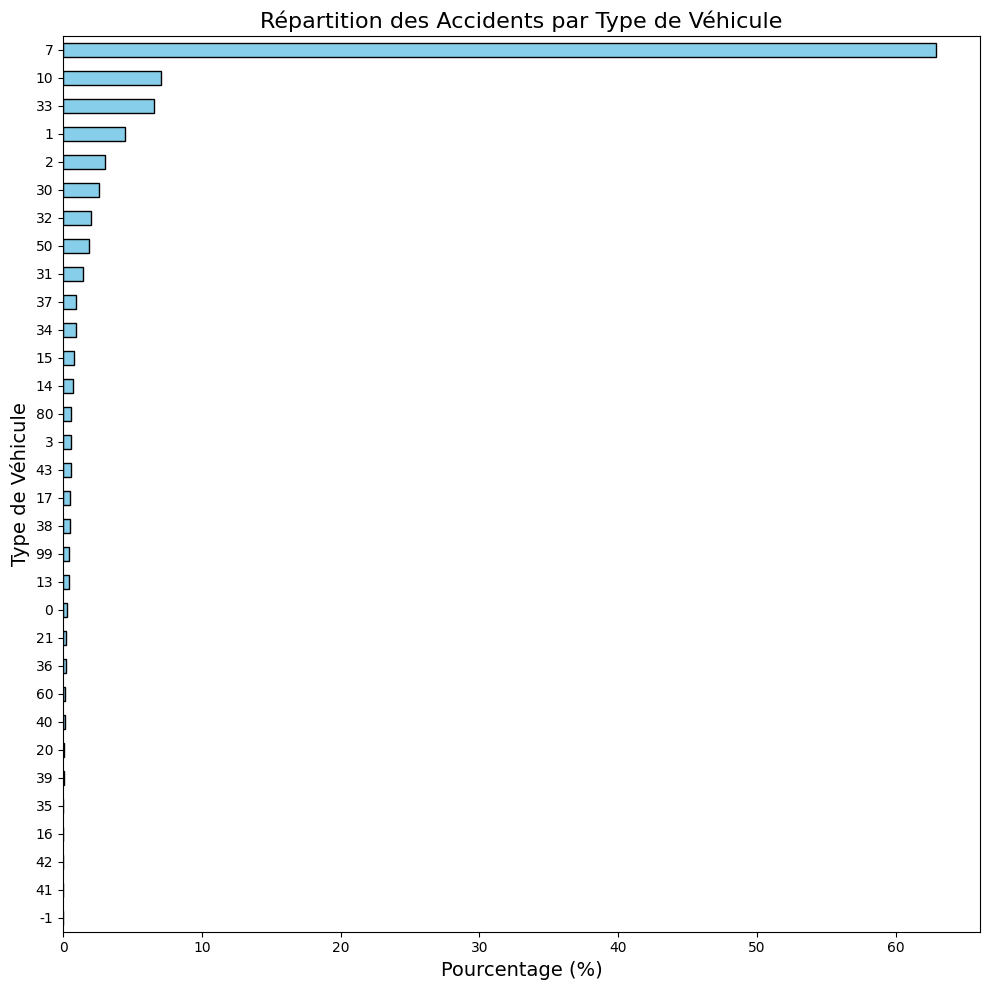

In [ ]:
# Calculer la distribution des véhicules
vehicle_distribution = df_overview['catv'].value_counts(normalize=True) * 100

# Trier les données pour une meilleure lisibilité
vehicle_distribution_sorted = vehicle_distribution.sort_values()

# Configurer le graphique
plt.figure(figsize=(10, 10))
vehicle_distribution_sorted.plot(kind='barh', color='skyblue', edgecolor='black')

# Titres et étiquettes
plt.title('Répartition des Accidents par Type de Véhicule', fontsize=16)
plt.ylabel('Type de Véhicule', fontsize=14)
plt.xlabel('Pourcentage (%)', fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.show()



#Commentaires:

Les données montrent que les véhicules légers sont nettement plus impliqués dans les accidents par rapport aux autres catégories de véhicules.
Il peut être judicieux de cibler les conducteurs de ces véhicules lors de campagnes de sensibilisation à la sécurité routière.

# 13.Répartition des Accidents par Sexe


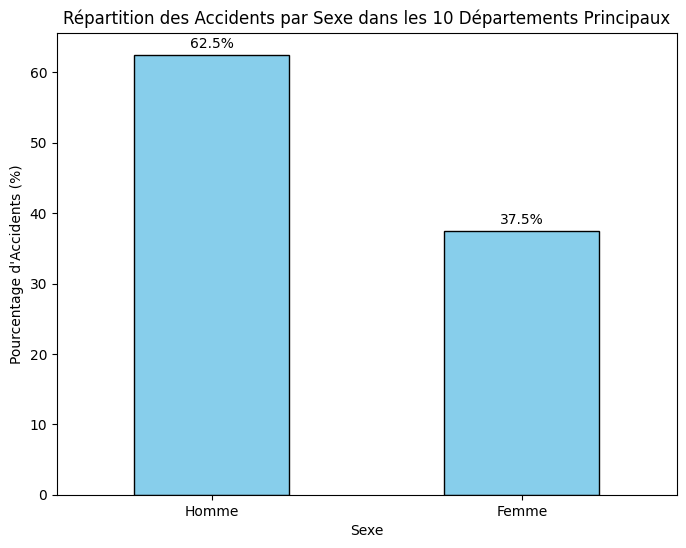

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Création de données d'exemple pour 'top_accidents' avec une colonne 'sexe'
top_accidents = pd.DataFrame({
    'sexe': np.random.choice(['Homme', 'Femme'], size=1000, p=[0.6, 0.4])
})

# Compter les accidents par sexe
sex_accidents = top_accidents['sexe'].value_counts()

# Convertir en pourcentage
sex_accidents_percentage = (sex_accidents / sex_accidents.sum()) * 100

# Création du graphique à barres pour le sexe en pourcentage
ax = sex_accidents_percentage.plot(kind='bar', figsize=(8, 6), color='skyblue', edgecolor='black')
plt.title('Répartition des Accidents par Sexe dans les 10 Départements Principaux')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage d\'Accidents (%)')
plt.xticks(ticks=[0, 1], labels=['Homme', 'Femme'], rotation=0)

# Ajout des pourcentages sur les barres
for i, value in enumerate(sex_accidents_percentage):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom')

# Affichage du graphique
plt.show()



# Commentaires, Analyses, Décisions à prendre :      
 En analysant les données des accidents de la route pour 2022, nous constatons que 62,5 % des accidents impliquent des hommes, tandis que 37,5 % impliquent des femmes. Ces statistiques pourraient indiquer que les hommes sont plus susceptibles d'être impliqués dans des accidents de la route que les femmes. Toutefois, cette donnée doit être interprétée avec prudence, car elle ne tient pas compte de variables potentiellement importantes telles que le nombre total de conducteurs par sexe, la fréquence de conduite, et les conditions dans lesquelles chacun est le plus susceptible de conduire.

Dans le cadre de "SafeDrive2022", cette information peut être utilisée pour élaborer des programmes de sensibilisation ciblée. Par exemple, il pourrait être pertinent de mettre en place des campagnes de sécurité routière spécifiquement adressées aux hommes, en se concentrant sur les facteurs de risque et les comportements de conduite qui conduisent à un taux d'accident plus élevé. Des initiatives telles que des cours de conduite défensive, des ateliers sur la gestion de la vitesse et de l'agressivité au volant, ou même des programmes d'éducation ciblés dans les communautés où les taux d'accidents sont particulièrement élevés chez les hommes pourraient être envisagées.